## Implementing Linear regression using Least Squares Method

In [32]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random
style.use('ggplot')

# A function to create a set of data points for a given variance and correlation
def dataset(data,variance,step=2,correlation=False):
    value=1
    ys=[]
    for i in range(data):
        a= random.randrange(-variance,variance) + value
        ys.append(a)
        if correlation and correlation=='pos':
            value+=step
        elif correlation and correlation=='neg':
            value-=step
    xs=[i for i in range(len(ys))]
    return np.array(xs), np.array(ys)

# 40 DATA POINTS, 25 VARIANCE, correlation strength = 2, positive correlation
X,y=dataset(40,25,2,'pos')
  

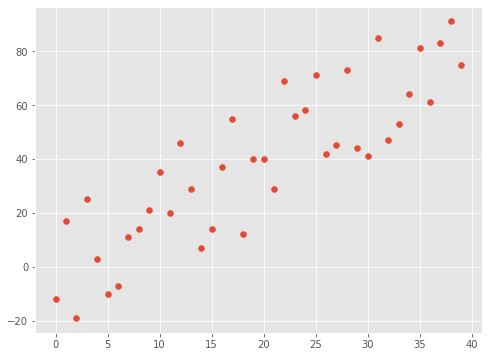

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(X,y)

## The model for linear Regression is given by Y = mx + b:  m = Slope , b = Intercept ot bias

#### m =  (N * Σ(xy) − Σx Σy) / (N * Σ(x2) − (Σx)2)
#### b =  (Σy − m Σx) / N

In [34]:
def slope_intercept(var1,var2):
    m=( (mean(var1)*mean(var2))-mean(var1*var2) )/( (mean(var1)*mean(var1))-(mean(var1*var1)) )
    b=mean(var2)-(m*mean(var1))
    return m,b
m, b=slope_intercept(X,y)
print("Slope m:",m)
print("Intercept b:", b)

Slope m: 2.0657894736842106
Intercept b: -1.25


## Calculate the best fit line using m and b

In [48]:
reg_line=[(m*x + b) for x in X]
y_mean=[mean(y) for x in y]
reg_line

[-1.25,
 0.8157894736842106,
 2.8815789473684212,
 4.947368421052632,
 7.0131578947368425,
 9.078947368421053,
 11.144736842105264,
 13.210526315789474,
 15.276315789473685,
 17.342105263157897,
 19.407894736842106,
 21.473684210526315,
 23.539473684210527,
 25.60526315789474,
 27.67105263157895,
 29.736842105263158,
 31.80263157894737,
 33.86842105263158,
 35.934210526315795,
 38.0,
 40.06578947368421,
 42.131578947368425,
 44.19736842105263,
 46.26315789473684,
 48.328947368421055,
 50.39473684210527,
 52.46052631578948,
 54.526315789473685,
 56.5921052631579,
 58.65789473684211,
 60.723684210526315,
 62.789473684210535,
 64.85526315789474,
 66.92105263157895,
 68.98684210526316,
 71.05263157894737,
 73.11842105263159,
 75.1842105263158,
 77.25,
 79.31578947368422]

## Plot the regression line

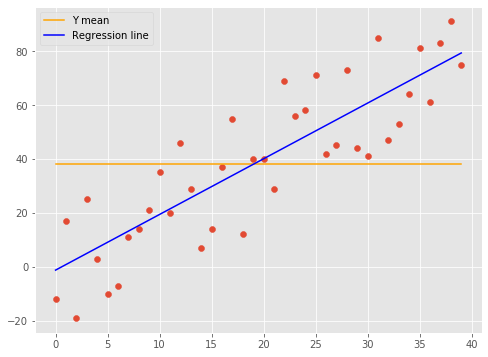

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.plot(X,y_mean,c='orange',label='Y mean')
plt.plot(X,reg_line, c='b',label='Regression line')
plt.legend()
plt.show()

## Computing Squared Error
## Error = (y - y_pred)^2

In [50]:
def squared_err(y,y_line):
    return (sum((y-y_line)**2))

### Squared error with respect to mean value of y

In [51]:
squared_err(y,y_mean)

32458

### Squared error with respect to regression line

In [52]:
squared_err(y,reg_line)

8493.42867036011

## Calculating R2 score which lies between 0 and 1. 
### 0 = no linear relationship, 1 = strong linear relationship
### R2 = 1 - (SSR / SST)            
#### SSR = sum of squared residuals,  SST = sum of squared Total Error

In [53]:
r2= 1-(squared_err(y,reg_line)/squared_err(y,y_mean))
r2

0.7383255693400669